# Introduction au structure de modèle causaux (SCM)

Ils permettent la tache d'identification. 

In [1]:
import pandas as pd
import numpy as np

data_sell = pd.read_csv("./data/cross_sell_email.csv")
data_sell

,gender,cross_sell_email,age,conversion
0,0,short,15,0
1,1,short,27,0
2,1,long,17,0
3,1,long,34,0
4,1,no_email,14,0
...,...,...,...,...
318,0,long,18,0
319,1,no_email,16,0
320,0,no_email,15,0
321,1,no_email,16,0


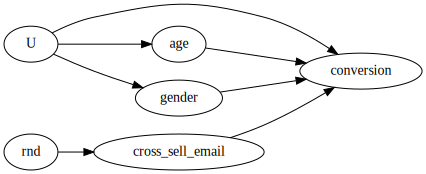

In [2]:
import graphviz as gr

g_cross_sell = gr.Digraph(graph_attr={"rankdir":'LR'})

g_cross_sell.edge('U', 'conversion')
g_cross_sell.edge('U', 'age')
g_cross_sell.edge('U', 'gender')

g_cross_sell.edge('rnd', 'cross_sell_email')
g_cross_sell.edge('cross_sell_email', 'conversion')
g_cross_sell.edge('age', 'conversion')
g_cross_sell.edge('gender', 'conversion')

g_cross_sell

Ici on utilise les variables:
- "rnd" pour signifier que les groupes ont été randomisé, 
- "U" pour les variables non observées

## Les motifs dans les structures de graph

### La chaine:

On a : $ T \not\perp Y $  
Lorsqu'on conditonne M on a: $ T \perp Y | M $ 

**Exemple :** Lorsque je connais les inférence causales je sais mieux résoudres les problèmes donc j'aurai plus facilement une promotion.
Les variables:  
- T: Connaitre les inférences causales,
- M: Résourde des problèmes
- Y: Avoir une promotion

Le fait de connaitre les inférences causales permet d'avoir une promotion si on regarde pas la variable resolution de problème $ T \not\perp Y $  
Hors on avoir si on regarde la résolution de problème l'un n'est pas directement relier à l'autre.  
Ce n'est pas parce que je mis connais en model causal que j'aurai une promotion donc $ T \perp Y | M $ 


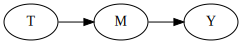

In [3]:
import graphviz as gr

g = gr.Digraph(graph_attr={"rankdir":'LR'})

g.edge('T', 'M')
g.edge('M', 'Y')

g

### La fourchette

**Pareil**

On a : $ T \not\perp Y $  
Lorsqu'on conditonne X on a: $ T \perp Y | X $

X est un facteur de confusion entre Y et T.

Exemple: On met un gateau à cuire dans un plat en plastique au sein d'un four  

On a comme variable:  
- X = Chaleur du four  
- Y = Le gateau cuit,
- T = le plat fond ou devient mou


Si on remarque que le gateau cuit et que la plat devient mou on dira qu'ils sont dépendant. ($ T \not\perp Y $  )

Mais on sait que l'un n'inflluence pas l'autre, c'est pas parce que le plat devient mou que le gateau cuit.  
Mais on sait que lorsque le four chauffe, cela fait cuire le gateau et rend mou le plat  
donc on rend les deux indépendants par rapport à la chaleur du four $ T \perp Y | X $

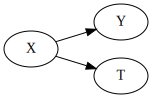

In [4]:
g = gr.Digraph(graph_attr={"rankdir":'LR'})

g.edge('X', 'Y')
g.edge('X', 'T')

g

### Le collider

On a : $ T \perp Y $  
Lorsqu'on conditonne X on a: $ T \not\perp Y | X $

**Exemple:** Pour avoir une promotion on peut soit flater le patron soit etre bon en stats.

Les variables:
- Y: Etre bon en stats
- T: Etre bon en flatterie
- X: Avoir une promotion

Je peux soit bon en stats soit en flatterie ou aucun des deux, cela est indépendant $ T \perp Y $  
Hors, si j'ai eu une promo, c'est soit parce que j'ai eu une promotion soit parce que je suis bon stats $ T \not\perp Y | X $  
Donc savoir que j'ai une promotion affirme que l'un est vrai comme les stats, et l'autre est faux donc la flatterie, ce qui les rends dépendants.

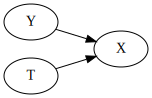

In [5]:
g = gr.Digraph(graph_attr={"rankdir":'LR'})

g.edge( 'Y', 'X')
g.edge('T', 'X')

g

### Quelques exos de graphes de causalité:

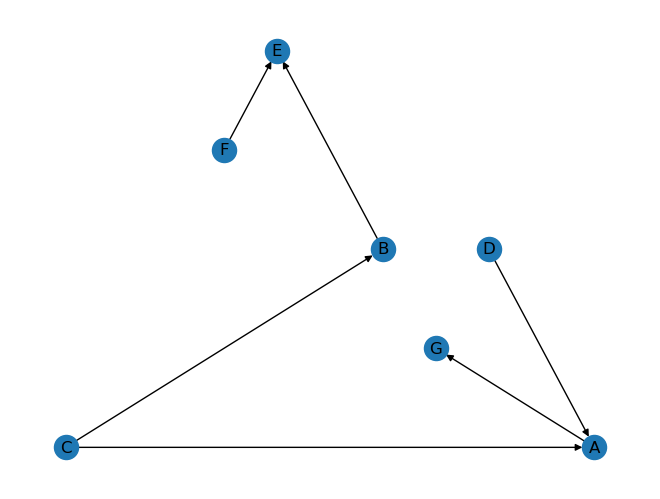

In [6]:
import networkx as nx

g = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("D", "A"),
    ("B", "E"),
    ("F", "E"),
    ("A", "G")
])
nx.draw_planar(g, with_labels=True)

In [7]:
for X, Y, Z in [
    ("D", "C", ""),
    ("D", "C", "A"),
    ("D", "C", "G"),
    ("A", "B", ""),
    ("A", "B", "C"),
    ("G", "F", ""),
    ("G", "F", "E"),
    ]:

    print(f"Est ce que {X} et {Y}", f" sachant {Z} " if Z != "" else "", "sont dépendants ?") 
    print(not (nx.d_separated(g, {X}, {Y}, {Z} if Z != "" else {})))

Est ce que D et C  sont dépendants ?
False
Est ce que D et C  sachant A  sont dépendants ?
True
Est ce que D et C  sachant G  sont dépendants ?
True
Est ce que A et B  sont dépendants ?
True
Est ce que A et B  sachant C  sont dépendants ?
False
Est ce que G et F  sont dépendants ?
False
Est ce que G et F  sachant E  sont dépendants ?
True


## Tache d'identification

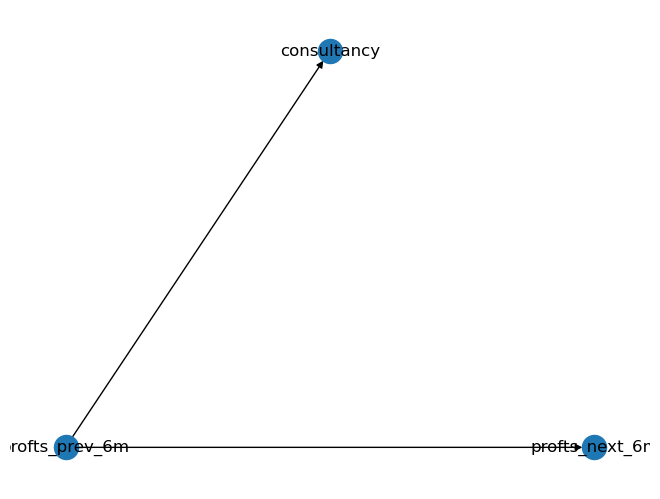

In [12]:
consultancy_model_served = nx.DiGraph(
    [
        ("profts_prev_6m", "profts_next_6m"),
        ("profts_prev_6m", "consultancy")
    ]
)

nx.draw_planar(consultancy_model_served, with_labels=True)

In [15]:
df = pd.DataFrame(dict(
    profits_prev_6m=[1.0, 1.0, 1.0, 5.0, 5.0, 5.0],
    consultancy=[0, 0, 1, 0, 1, 1],
    profits_next_6m=[1, 1.1, 1.2, 5.5, 5.7, 5.7],
))

df

,profits_prev_6m,consultancy,profits_next_6m
0,1.0,0,1.0
1,1.0,0,1.1
2,1.0,1,1.2
3,5.0,0,5.5
4,5.0,1,5.7
5,5.0,1,5.7


In [17]:
df.query("consultancy==1")["profits_next_6m"].mean()-df.query("consultancy==0")["profits_next_6m"].mean()

1.666666666666667

Ici il ne s'agit pas de l'effet causal d'avoir un consultant ou non, ici la représentation est biaisé car on a deux groupe.
Les 1 vs 5 M de CA, il faut donc les prendre en comptes dans la moyenne des groupes.

**Ce qui revient à calculer l'ATE (effet backdoor):**
$$
    ATE = \sum_x{E[Y|T=1,X=x]P(X=x)-E[Y|T=0,X=x]P(X=x)}
$$

Si X est soit 0 ou 1 on a notre moyenne pondérer

In [23]:
avg_df = df.groupby(["consultancy", "profits_prev_6m"])["profits_next_6m"].mean()
mean_t1t0 = avg_df.loc[1] - avg_df.loc[0]

print("Une différence apporter",mean_t1t0.mean())

print(mean_t1t0)

0.17500000000000004
profits_prev_6m
1.0    0.15
5.0    0.20
Name: profits_next_6m, dtype: float64


Ici le mean_t1t0.mean() est possible car on sait que les groupes 1 et 5 de CA sont de meme tailles, sinon il aurait fallu faire une moyenne pondérer pour un résultat plus correcte. 
Pour affirmer ce résultat (1.75 de CA), il faut supposer que les perf passées ont pour seule conséquence les perf future en plus d'avoir un consultant.

Voici un exemple de ATE.

## Autre infos:

- Les **frontsdoor adjustements**, si le backdoor n'est pas possible (car pas la var) peut conditionner des chemins et considrer que si X -> Z -> Y, on l'effet de X sur Z on récupère pour mesurer l'effet de Z sur Y. 
Implicitement on a notre effet X -> Y.

- Les **biais de confusion** ils sont là quand le résultat de X sur Y n'est pas dû à lui totalement. il y a deuxième variables qui explique cela.

- Les **confusion de substitution (surrogate confounding)** si le biais de confusion n'est pas identifiable mais qu'il y a des variables jouant sur ce biais, on peut les utiliser pour limiter l'effet du biais sur le résultat.

- Les **biais de selection**, 

True

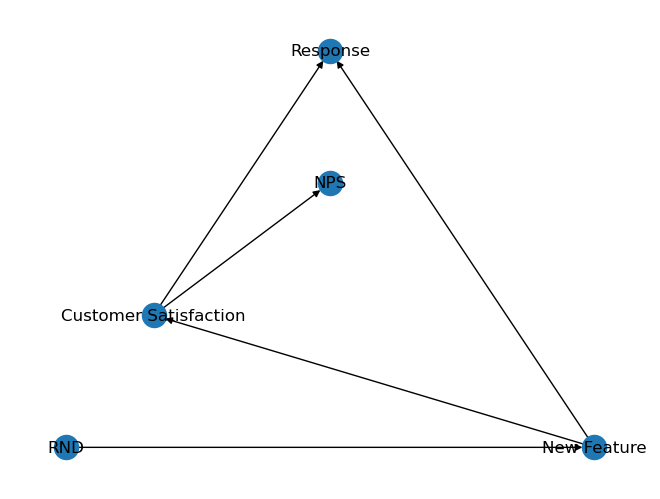

In [29]:
nps_model = nx.DiGraph([
("RND", "New Feature"),
("New Feature", "Customer Satisfaction"),
("Customer Satisfaction", "NPS"),
("Customer Satisfaction", "Response"),
("New Feature", "Response"),
])
nx.draw_planar(nps_model, with_labels=True)
not(nx.d_separated(nps_model, {"NPS"}, {"New Feature"}, {"Response"}))